# 유저가 좋아할 만한 레시피 상위 5개 추천
# -> 입력한 재료(디텍팅 통해 나온 클래스명)에 따른 레시피 추천

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## 데이터 업로드

In [2]:
## 포함할 recipe ID

recipe_ids = list()

with open("../data/레시피id(1699개)_id_list.txt", 'r', encoding="utf-8") as f:
    lines = f.readlines()
    for line in lines:
        recipe_ids.append(line.split("\n")[0])

with open("../data/레시피id(6592개)_id_list.txt", 'r', encoding="utf-8") as f:
    lines = f.readlines()
    for line in lines:
        recipe_ids.append(line.split("\n")[0])

print("개수: ", len(recipe_ids))
print("종류 수", len(set(recipe_ids)))

개수:  8291
종류 수 6592


In [3]:
# Food.com Recipes and Interactions 데이터 (RAW_interactions.csv)
path = '../data/'
ratings_df = pd.read_csv(path + 'RAW_interactions.csv', encoding='utf-8')
ratings_df["recipe_id"] = ratings_df["recipe_id"].astype(str)
print("Ratings: ", len(ratings_df))
print("userID: ", ratings_df["user_id"].nunique())
print("recipeID: ", ratings_df["recipe_id"].nunique())

Ratings:  1132367
userID:  226570
recipeID:  231637


In [4]:
# Food.com Recipes and Interactions 데이터 (RAW_recipes.csv)
raw_recipes_df = pd.read_csv(path + 'RAW_recipes.csv', encoding='utf-8')
raw_recipes_df["id"] = raw_recipes_df["id"].astype(str)
print("Raw_Recipes: ", len(raw_recipes_df))

Raw_Recipes:  231637


## 데이터 전처리

### 포함할 Recipe ID 로 필터하기

In [5]:
ratings_df

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [6]:
##### 바로 위 rating_df 전체 데이터에 11만여개 중에 대해 레시피 id로 필터 한 번 거치기
### 레시피 6592개가 포함 된 rating만 보게

In [7]:
ratings_df = ratings_df[ratings_df["recipe_id"].isin(recipe_ids)]
print("Ratings: ", len(ratings_df))
print("userID: ", ratings_df["user_id"].nunique())
print("recipeID: ", ratings_df["recipe_id"].nunique())

Ratings:  36097
userID:  15021
recipeID:  6592


In [8]:
### ㄴ그렇게 추린 게 36097개, user id는 15021

In [9]:
ratings_df

,user_id,recipe_id,date,rating,review
227,89831,225171,2007-05-29,5,These were buttery rich delicious! I made thes...
228,352538,225171,2010-12-01,5,"Love, love these. The rice flour gives such a..."
229,222564,225171,2012-12-23,5,"Good, solid basic recipe. Turns out just like ..."
237,278639,281620,2008-02-04,5,I have made salmon patties from many different...
238,693345,281620,2008-09-17,5,This is a great recipe! I have never made salm...
...,...,...,...,...,...
1132137,346860,116202,2008-09-09,5,"Beautiful, simple, perfect."
1132138,4470,116202,2009-05-16,5,So easy abd so tasty. The lemon enriches the ...
1132139,60486,116202,2009-05-28,3,Simple and tasty. Steamed in the microwave. ...
1132140,222478,116202,2010-05-07,5,"Tasty, quick and healthy! Great proof you don'..."


### 리뷰를 10개 이상 남긴 유저만 남기기

(array([1.3504e+04, 5.7400e+02, 3.4400e+02, 1.2700e+02, 1.1900e+02,
        5.8000e+01, 4.8000e+01, 2.5000e+01, 3.5000e+01, 2.3000e+01,
        2.2000e+01, 1.8000e+01, 1.2000e+01, 5.0000e+00, 1.7000e+01,
        3.0000e+00, 1.5000e+01, 5.0000e+00, 9.0000e+00, 3.0000e+00,
        7.0000e+00, 2.0000e+00, 4.0000e+00, 3.0000e+00, 2.0000e+00,
        2.0000e+00, 0.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00,
        2.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

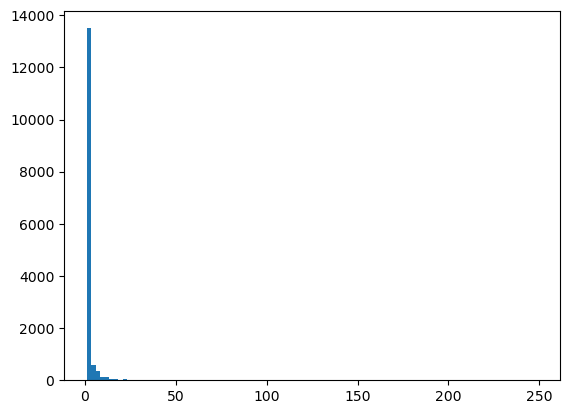

In [10]:
## 유저별 리뷰 수의 히스토그램
UserReviewCnt = ratings_df.groupby("user_id").count()["recipe_id"].sort_values(ascending=False)
plt.hist(UserReviewCnt, bins=100)

리뷰 1~2개만 남긴 사람이 매우 많음

In [11]:
# 각 유저별 리뷰 남긴 횟수
UserReviewCnt

user_id
424680        249
37449         227
305531        190
369715        167
383346        155
             ... 
416220          1
416322          1
416413          1
416605          1
2002370648      1
Name: recipe_id, Length: 15021, dtype: int64

userID:  524
recipeID:  4708


(array([136.,  67.,  55.,  30.,  30.,  27.,  27.,  20.,  14.,   6.,  13.,
          9.,   6.,  12.,   5.,   9.,   3.,   7.,   2.,   3.,   4.,   2.,
          1.,   1.,   2.,   3.,   2.,   2.,   2.,   1.,   3.,   1.,   1.,
          2.,   1.,   0.,   1.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 10.  ,  12.39,  14.78,  17.17,  19.56,  21.95,  24.34,  26.73,
         29.12,  31.51,  33.9 ,  36.29,  38.68,  41.07,  43.46,  45.85,
         48.24,  50.63,  53.02,  55.41,  57.8 ,  60.19,  62.58,  64.97,
         67.36,  69.75,  72.14,  74.53,  76.92,  79.31,  81.7 ,  84.09,
         86.48,  88.87,  91.26

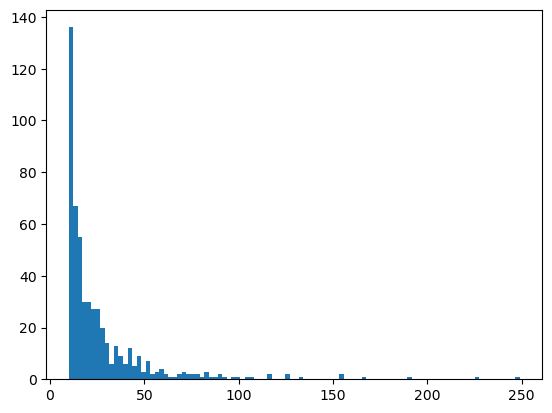

In [12]:
## 위 애들 중에서 리뷰를 10개 이상 남긴 유저로 필터하기
UserIdOver = UserReviewCnt[UserReviewCnt >= 10].index.tolist()
ratings_df = ratings_df[ratings_df["user_id"].isin(UserIdOver)]
print("userID: ", ratings_df["user_id"].nunique())
print("recipeID: ", ratings_df["recipe_id"].nunique())
UserReviewCnt = ratings_df.groupby("user_id").count()["recipe_id"].sort_values(ascending=False)
plt.hist(UserReviewCnt, bins=100)

### User-Item Matrix 생성 및 User 및 Item 각각 index와 id 맵핑하기

In [13]:
R = ratings_df.pivot_table('rating', 'user_id', 'recipe_id').fillna(0)

In [14]:
ratings_df.pivot_table('rating', 'user_id', 'recipe_id').fillna(0)

recipe_id,100089,100146,100219,100540,100604,100781,100853,101009,101015,101188,...,99491,99547,99554,99603,99618,99675,99711,99752,99759,99991
user_id,,,,,,,,,,,,,,,,,,,,,
1535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0
2310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5060,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2123645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2597942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
ratings_df

,user_id,recipe_id,date,rating,review
227,89831,225171,2007-05-29,5,These were buttery rich delicious! I made thes...
229,222564,225171,2012-12-23,5,"Good, solid basic recipe. Turns out just like ..."
237,278639,281620,2008-02-04,5,I have made salmon patties from many different...
238,693345,281620,2008-09-17,5,This is a great recipe! I have never made salm...
561,13483,120964,2005-05-15,5,Well these are just gems. They are so much be...
...,...,...,...,...,...
1132133,1535,116202,2007-03-29,5,We really liked how the lemon complimented the...
1132134,180090,116202,2007-04-29,5,This is the healthiest way to make asparagus! ...
1132138,4470,116202,2009-05-16,5,So easy abd so tasty. The lemon enriches the ...
1132140,222478,116202,2010-05-07,5,"Tasty, quick and healthy! Great proof you don'..."


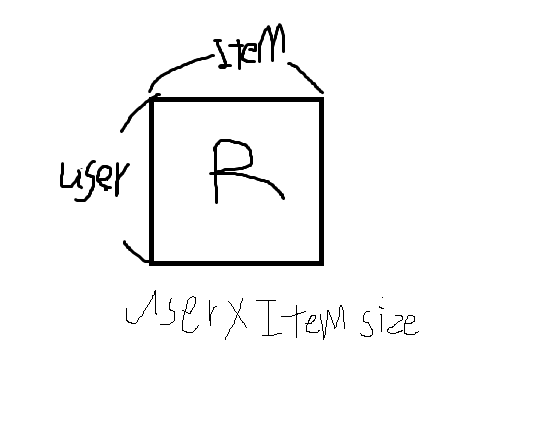

In [136]:
R = ratings_df.pivot_table('rating', 'user_id', 'recipe_id').fillna(0) # 유저,아이템 매트릭스 구조로 할 것이기 때문에

# 인덱스 매핑
## 위 pivot_table로 생성된 df를 보면 index가 사실 0번째지만 행,열이 1535, 10089부터 시작해서
index2userid_df = pd.DataFrame(R.index).reset_index()
index2userid = dict(zip(index2userid_df.index, index2userid_df.user_id))
userid2index = dict(zip(index2userid_df.user_id, index2userid_df.index))

index2recipeid_df = pd.DataFrame(R.T.index).reset_index()
index2recipeid = dict(zip(index2recipeid_df.index, index2recipeid_df.recipe_id))
recipeid2index = dict(zip(index2recipeid_df.recipe_id, index2recipeid_df.index))

R = R.to_numpy()  # 학습할 때는 Numpy Array로 변환해줘야함
print("User-Item Matrix Size: ", R.shape)

User-Item Matrix Size:  (524, 4708)


In [137]:
R

array([[0., 0., 0., ..., 5., 0., 5.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [138]:
index2userid

{0: 1535,
 1: 2310,
 2: 4439,
 3: 4470,
 4: 5060,
 5: 6258,
 6: 6357,
 7: 6651,
 8: 7108,
 9: 8629,
 10: 8688,
 11: 9869,
 12: 11297,
 13: 12657,
 14: 13483,
 15: 13796,
 16: 14410,
 17: 15521,
 18: 17803,
 19: 18391,
 20: 20480,
 21: 20754,
 22: 21752,
 23: 22015,
 24: 22973,
 25: 24386,
 26: 25792,
 27: 26512,
 28: 27395,
 29: 27643,
 30: 27678,
 31: 27783,
 32: 28087,
 33: 28177,
 34: 28636,
 35: 28649,
 36: 29196,
 37: 29418,
 38: 29782,
 39: 30503,
 40: 30534,
 41: 31499,
 42: 32058,
 43: 32772,
 44: 33159,
 45: 33588,
 46: 35140,
 47: 35526,
 48: 35635,
 49: 36128,
 50: 36944,
 51: 37036,
 52: 37305,
 53: 37449,
 54: 37636,
 55: 37779,
 56: 37868,
 57: 38182,
 58: 38643,
 59: 39301,
 60: 39334,
 61: 39835,
 62: 40961,
 63: 41578,
 64: 41809,
 65: 41984,
 66: 42720,
 67: 43083,
 68: 44372,
 69: 45999,
 70: 46545,
 71: 47510,
 72: 47559,
 73: 47892,
 74: 47907,
 75: 49304,
 76: 50509,
 77: 50969,
 78: 51011,
 79: 52125,
 80: 52282,
 81: 52448,
 82: 52543,
 83: 53932,
 84: 53959,
 8

### RAW_Recipes 데이터 중 포함할 Recipe만 필터하기

In [139]:
recipe_ids = ratings_df["recipe_id"].unique().tolist()
raw_recipes_df = raw_recipes_df[raw_recipes_df["id"].isin(recipe_ids)]
print(ratings_df["recipe_id"].nunique()) #.nunique() 유니크한 값 개수
raw_recipes_df.head(2)

4708


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4
16,chile rellenos,43026,45,52268,2002-10-14,"['60-minutes-or-less', 'time-to-make', 'course...","[94.0, 10.0, 0.0, 11.0, 11.0, 21.0, 0.0]",9,"['drain green chiles', 'sprinkle cornstarch on...",a favorite from a local restaurant no longer i...,"['egg roll wrap', 'whole green chilies', 'chee...",5


In [140]:
raw_recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4708 entries, 5 to 231567
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            4708 non-null   object
 1   id              4708 non-null   object
 2   minutes         4708 non-null   int64 
 3   contributor_id  4708 non-null   int64 
 4   submitted       4708 non-null   object
 5   tags            4708 non-null   object
 6   nutrition       4708 non-null   object
 7   n_steps         4708 non-null   int64 
 8   steps           4708 non-null   object
 9   description     4635 non-null   object
 10  ingredients     4708 non-null   object
 11  n_ingredients   4708 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 478.2+ KB


In [141]:
# 널값 제거

raw_recipes_df = raw_recipes_df.dropna(subset=['description'])
raw_recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4635 entries, 16 to 231567
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            4635 non-null   object
 1   id              4635 non-null   object
 2   minutes         4635 non-null   int64 
 3   contributor_id  4635 non-null   int64 
 4   submitted       4635 non-null   object
 5   tags            4635 non-null   object
 6   nutrition       4635 non-null   object
 7   n_steps         4635 non-null   int64 
 8   steps           4635 non-null   object
 9   description     4635 non-null   object
 10  ingredients     4635 non-null   object
 11  n_ingredients   4635 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 470.7+ KB


### 레시피 ID 와 레시피 이름을 Dictionary로 맵핑하기

In [142]:
id2recipename = dict(zip(raw_recipes_df.id, raw_recipes_df.name))
id2recipename

{'43026': 'chile rellenos',
 '23933': 'chinese  candy',
 '39947': 'sugared grapes',
 '234069': '1 easiest dr  pepper ham glaze ever',
 '100540': 'almost grilled  cheese sandwich',
 '165385': 'cloud nine',
 '204270': 'company  green beans',
 '16327': 'creamed  spinach',
 '128715': 'first  skillet cornbread',
 '280918': 'fried  bacon in the oven',
 '457965': 'gilded  zucchini',
 '174469': 'off the boat  sicilian pasta sauce',
 '218648': 'one of  cookies  no bake  4 ingredients',
 '25512': 'p anana confetti circles',
 '16451': 'lite  stuffed mushrooms',
 '15211': 'potatoes  pommes anna',
 '468143': 'ultimate  dark chocolate oreo truffle',
 '370567': 'tasty   approved golden quesadillas',
 '249911': '007 cocktail',
 '255928': '1 2 3 banana split ice cream cake',
 '374271': '1 potato 2 potato',
 '90499': '10 minute smothered chicken',
 '423880': '10 second mango yogurt smoothie',
 '20238': '100 year old souffle',
 '468112': '100  spelt bread  bread machine',
 '242259': '1905 blue ribbon fru

### 각 재료가 포함된 레시피를 맵핑하기

In [143]:
ingredients = [
    "sausage", "bacon", "chicken breast", "chicken thigh", "chicken wing", "beef", "pork", "lamb", "rib", "ham",
    "onion", "garlic", "tomato", "corn", "potato", "ginger", "carrot", "pea", "mushroom", "celery", "spinach",
    "zucchini", "broccoli", "cucumber", "cabbage", "pumpkin", "avocado", "green beans", "radish", "asparagus",
    "leek", "cauliflower", "eggplant", "fennel", "lettuce", "chilli", "sweet potato", "lemon", " apple", "orange",
    "lime", "coconut", "pineapple", "banana", "avocado", "peach", "pear", "apricot", "strawberry", "mango",
    "grapefruit", "watermelon", "plantain", "tangerine", "cream", "chocolate", "yogurt", "sugar", "butter",
    "cheese", "egg", "flour", "milk", "rice", "tofu", "noodle", "oil", "salt"]

ingredients2recipe = dict()
for row in raw_recipes_df.itertuples():
    recipeid = row[2]
    for ingre in ingredients:
        if ingre in row[-2]:
            if ingre not in ingredients2recipe:
                ingredients2recipe[ingre] = [recipeid]
            else:
                ingredients2recipe[ingre].append(recipeid)
                ingredients2recipe[ingre] = list(set(ingredients2recipe[ingre]))
print("리뷰 10개 이상 유저로 필터하다보니 해당 재료가 들어간 레시피가 제외됨:" , set(ingredients) - set(ingredients2recipe.keys()))

리뷰 10개 이상 유저로 필터하다보니 해당 재료가 들어간 레시피가 제외됨: {'tangerine', 'plantain', 'chilli'}


In [144]:
ingredients2recipe

{'corn': ['39394',
  '375749',
  '86172',
  '71730',
  '392707',
  '317357',
  '112396',
  '128904',
  '6868',
  '373694',
  '13801',
  '146397',
  '410794',
  '352330',
  '64354',
  '72363',
  '139914',
  '129228',
  '336950',
  '413824',
  '456127',
  '408728',
  '64676',
  '163942',
  '516847',
  '224699',
  '34909',
  '22128',
  '295499',
  '154839',
  '197850',
  '15659',
  '254218',
  '456138',
  '121283',
  '43065',
  '161850',
  '263153',
  '46127',
  '484123',
  '502841',
  '179191',
  '375401',
  '228335',
  '198447',
  '104134',
  '237022',
  '370127',
  '276889',
  '135052',
  '223823',
  '70042',
  '143183',
  '132470',
  '162614',
  '37530',
  '69046',
  '33326',
  '368559',
  '379314',
  '12584',
  '25284',
  '502461',
  '9129',
  '124349',
  '140539',
  '135115',
  '382813',
  '203499',
  '387296',
  '12616',
  '84897',
  '280780',
  '157414',
  '384619',
  '86852',
  '287045',
  '144886',
  '267629',
  '492503',
  '82388',
  '153302',
  '467124',
  '351804',
  '19662',

## 추천 시스템 (ALS) 학습

In [145]:
import time
import numpy as np
from tqdm import tqdm_notebook as tqdm

class AlternatingLeastSquares():
    def __init__(self, R, k, regularization, iterations, verbose=False):
        """
        Arguments
        - R (ndarray)             : 유저 아이템 매트릭스
        - k (int)                 : latent factor 차원
        - reg_param (float)       : regularization parameter
        - epochs (int)            : als로 파라미터 업데이트를 수행하는 횟수
        - verbose (boolean)       : 학습 과정의 status print 옵션
        """
        self.R = R
        self.num_users, self.num_items = R.shape # (504, 4708)
        self.k = k                               # k 차원의 벡터로 만들겠다
        self.regularization = regularization     # 람다 (정규화텀)
        self.iterations = iterations             # 업데이트 반복 횟수
        self.verbose = verbose                   # 출력할지말지


    def fit(self):
 
        # 유저, 아이템 매트릭스를 초기화 (정규분포), 잠재벡터 사이즈 k
        self.users = np.random.normal(scale=1./self.k, size=(self.num_users, self.k))  # users X k (504, 500) 행렬을 만들어서 정규분포로 랜덤하게 값 채움
        self.items = np.random.normal(scale=1./self.k, size=(self.num_items, self.k))  # items X k (4708, 500) 행렬을 만들어서 정규분포로 랜덤하게 값 채움

        # iteration 개수만큼 ALS를 수행하여 유저, 아이템 파라미터를 업데이트함
        self._training_process = [] 
        for iteration in range(self.iterations):
            t1 = time.time()

            # Item Latent 행렬은 고정 
            for i, Ri in enumerate(self.R):
                # Rating 행렬에서 user vector 한명씩 돌아가면서 latent 업데이트 
                self.users[i] = self.user_latent(i, Ri)  # 1번~504번의 유저별로 k사이즈의 벡터를 업데이트 (이때 아이템 행렬 self.items는 고정)

            # User Latent 행렬은 고정 
            for j, Rj in enumerate(self.R.T):
                # Rating 행렬에서 item vector 하나씩 돌아가면서 latent 업데이트 
                self.items[j] = self.item_latent(j, Rj)  # 1번~4708번의 아이템(레시피)별로 k사이즈의 벡터를 업데이트 (이때 유저 행렬 self.users는 고정)
                
            t2 = time.time()
            print("Training Time: ", t2-t1)
            # iteration 수행이 끝날때마다 training loss를 계산함
            cost = self.cost()
            self._training_process.append((iteration, cost))

            # iteration마다 loss를 출력하는 옵션
            if self.verbose == True:
                print("Iteration: %d, cost = %.4f" % (iteration + 1, cost))

    def cost(self):
        """
        학습 데이터 전체의 rmse 계산
        """
        xi, yi = self.R.nonzero()  # Rating이 있는 User-Item 조합만으로 Cost를 계산
        cost = 0
        for x, y in zip(xi, yi):
            cost += pow(self.R[x, y] - self.get_prediction(x, y), 2) # y - y_hat
        return np.sqrt(cost/len(xi))  ## RMSE 평가지표


    def user_latent(self, i, Ri):
        """
        유저 i에 대한 유저 벡터 업데이트
        """
        ## np.dot: 내적
        ## np.eye: 단위행렬
        ## np.solve: 연립방정식 해 풀기
        # self.items : Q (아이템 행렬)
        du = np.linalg.solve(np.dot(self.items.T, self.items) + self.regularization * np.eye(self.k), np.dot(self.items.T, self.R[i].T)).T
        return du

    def item_latent(self, j, Rj):
        """
        아이템 j에 대한 아이템 벡터 업데이트
        """
        ## np.dot: 내적
        ## np.eye: 단위행렬
        ## np.solve: 연립방정식 해 풀기
        # 파라미터 업테이트 수식
        di = np.linalg.solve(np.dot(self.users.T, self.users) + self.regularization * np.eye(self.k), np.dot(self.users.T, self.R[:, j]))
        return di


    def get_prediction(self, i, j):
        """
        유저 i, 아이템 j에 대한 예측 평점
        """
        # print("user: ", self.users[i, :])
        # print("item: ", self.items[j, :].T)
        return self.users[i, :].dot(self.items[j, :].T) # i번째 유저가 j번째 레시피에 대한 예측 평점


    def get_full_matrix(self):
        """
        예측된 유저 아이템 매트릭스를 계산 Rhat
        """
        return self.users.dot(self.items.T)

In [146]:
import time
t1 = time.time()
als = AlternatingLeastSquares(R = R, regularization = 1, iterations=3, verbose=True, k=500) # 람다=1 : 좀더 정규화↑, 0.01 : 오버피팅 확률↑. 어느 값이 베스트일 지는 해봐야 앎, k:잠재 벡터 수.
als.fit()  # 학습하기
t2 = time.time()
print("Execution Time: ", t2 - t1)

Training Time:  208.2348473072052
Iteration: 1, cost = 2.3478
Training Time:  196.56148719787598
Iteration: 2, cost = 0.6917
Training Time:  173.60003423690796
Iteration: 3, cost = 0.5366
Execution Time:  578.8202338218689


ㄴ cost : 2.35 -> 평점이 0~5점 사이인데 에러가 대략 3점 정도 난다는 뜻. 그래도 학습이 갈 수록 줄어듦. 2.35->0.69 처럼 한 번에 쭉 떨어지고 그 이상은 미미하게 떨어지거나 올라갈 수도 있음

## UserID 와 Ingredient가 주어졌을 때 Top K recipe추천하기

In [147]:
# userid2index.keys()

In [148]:
# recipeid2index.keys()

In [149]:
ingredients = [
    "sausage", "bacon", "chicken breast", "chicken thigh", "chicken wing", "beef", "pork", "lamb", "rib", "ham",
    "onion", "garlic", "tomato", "corn", "potato", "ginger", "carrot", "pea", "mushroom", "celery", "spinach",
    "zucchini", "broccoli", "cucumber", "cabbage", "pumpkin", "avocado", "green beans", "radish", "asparagus",
    "leek", "cauliflower", "eggplant", "fennel", "lettuce", "sweet potato", "lemon", " apple", "orange",
    "lime", "coconut", "pineapple", "banana", "avocado", "peach", "pear", "apricot", "strawberry", "mango",
    "grapefruit", "watermelon", "cream", "chocolate", "yogurt", "sugar", "butter",
    "cheese", "egg", "flour", "milk", "rice", "tofu", "noodle", "oil", "salt"]

In [152]:
def recommend(userid, ingredients, k):
    userIndex = userid2index[userid]             # userid > User Index
    recipeSet = set(ingredients2recipe[ingredients[0]])
    if len(ingredients) > 1:
        for ingredient in ingredients[1:]:
            recipeSet = recipeSet.intersection(set(ingredients2recipe[ingredient]))  # bacon이 포함된 레시피 목록
    if len(recipeSet) == 0:
        print(f"해당 재료 조합으로 가능한 레시피가 없습니다: {ingredients}")
        return list()
    else:
        print(f"해당 재료 조합으로 가능한 레시피는 총 {len(recipeSet)}개입니다. 그 중 {k}개의 레시피만 추천합니다.")
    
    recipeIndexList = sorted([recipeid2index[recipeID] for recipeID in recipeSet])
    predictions = [als.get_prediction(userIndex, recipeIndex) for recipeIndex in recipeIndexList]
    pred_df = pd.DataFrame.from_dict({"idx": recipeIndexList, "pred": predictions})
    topk = pred_df.sort_values(by="pred", ascending=False)[:k]
    topk = [(index2recipeid[idx], id2recipename[index2recipeid[idx]]) for idx in topk["idx"].values]
    return topk

userid = 278639
ingredients = ["egg", "salt", "coconut"]
results = recommend(userid, ingredients, 5)
print(results)
print()
print("즐거운 요리 시간 되세요~😋")

해당 재료 조합으로 가능한 레시피는 총 7개입니다. 그 중 5개의 레시피만 추천합니다.
[('94837', 'coconut   lime squares'), ('147314', 'macaroons made easy'), ('300684', 'chocolate coconut cheesecake squares'), ('497981', 'scrambled eggs with coconut oil'), ('129703', 'coconut lime bars')]

즐거운 요리 시간 되세요~😋


In [151]:
# 0: bacon
# 1: eggplant
# 2: apple
# 3: tofu 

# # 사진 > 이미지 디텍팅 모델 > 식재료 클래스들 3,5,10의 식재료 이름 > 추천에 ingredient로 입력을 받게 해줘야할듯